In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,NaN,little,1169,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,little,moderate,5951,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,little,NaN,2096,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,little,little,7882,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,little,little,4870,1


In [4]:
data

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,NaN,little,1169,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,little,moderate,5951,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,little,NaN,2096,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,little,little,7882,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,little,little,4870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,little,NaN,1736,0
996,996,997,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12,little,little,3857,1
997,997,998,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10,little,NaN,804,0
998,998,999,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13,little,little,1845,0


In [5]:
data["House_Ownership_In_Months"] = data["CURRENT_HOUSE_YRS"]*12
data = data.drop("CURRENT_HOUSE_YRS", axis=1)

In [6]:
data["Credit amount"] = data["Credit amount"]*1000

In [7]:
data.shape

(1000, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1000 non-null   int64 
 1   Id                         1000 non-null   int64 
 2   Income                     1000 non-null   int64 
 3   Age                        1000 non-null   int64 
 4   Experience                 1000 non-null   int64 
 5   Married/Single             1000 non-null   object
 6   House_Ownership            1000 non-null   object
 7   Car_Ownership              1000 non-null   object
 8   Profession                 1000 non-null   object
 9   CITY                       1000 non-null   object
 10  STATE                      1000 non-null   object
 11  CURRENT_JOB_YRS            1000 non-null   int64 
 12  Saving accounts            817 non-null    object
 13  Checking account           606 non-null    object
 14  Credit am

In [9]:
data.isna().sum()

Unnamed: 0                     0
Id                             0
Income                         0
Age                            0
Experience                     0
Married/Single                 0
House_Ownership                0
Car_Ownership                  0
Profession                     0
CITY                           0
STATE                          0
CURRENT_JOB_YRS                0
Saving accounts              183
Checking account             394
Credit amount                  0
Risk_Flag                      0
House_Ownership_In_Months      0
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,Id,Income,Age,Experience,CURRENT_JOB_YRS,Credit amount,Risk_Flag,House_Ownership_In_Months
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,500.500000,5.019355e+06,50.512000,9.981000,6.308000,3.271258e+06,0.169000,144.732000
std,288.819436,288.819436,2.896927e+06,17.025561,6.010055,3.725186,2.822737e+06,0.374939,17.395366
min,0.000000,1.000000,1.031000e+04,21.000000,0.000000,0.000000,2.500000e+05,0.000000,120.000000
25%,249.750000,250.750000,2.482026e+06,36.000000,5.000000,3.000000,1.365500e+06,0.000000,132.000000
50%,499.500000,500.500000,4.983860e+06,50.000000,10.000000,6.000000,2.319500e+06,0.000000,144.000000
75%,749.250000,750.250000,7.505453e+06,66.000000,15.000000,9.000000,3.972250e+06,0.000000,156.000000
max,999.000000,1000.000000,9.999180e+06,79.000000,20.000000,14.000000,1.842400e+07,1.000000,168.000000


In [11]:
for col in ['Saving accounts', 'Checking account']:
    data[col] = data[col].fillna('none')

In [12]:
print("No Risk count = ", ((data["Risk_Flag"]).value_counts()[0] * 100) / 1000)
print("Risk count = ", ((data["Risk_Flag"]).value_counts()[1] * 100) / 1000)

No Risk count =  83.1
Risk count =  16.9


In [13]:
#columns = ["Married/Single", "House_Ownership", "Car_Ownership", "Risk_Flag", "STATE", "CITY", "Profession"]
#for col in columns:
#    print(col)
#    print(data[col].unique())

In [14]:
#data['STATE'] = data['STATE'].replace(['Uttar_Pradesh[5]'], 'Uttar_Pradesh')

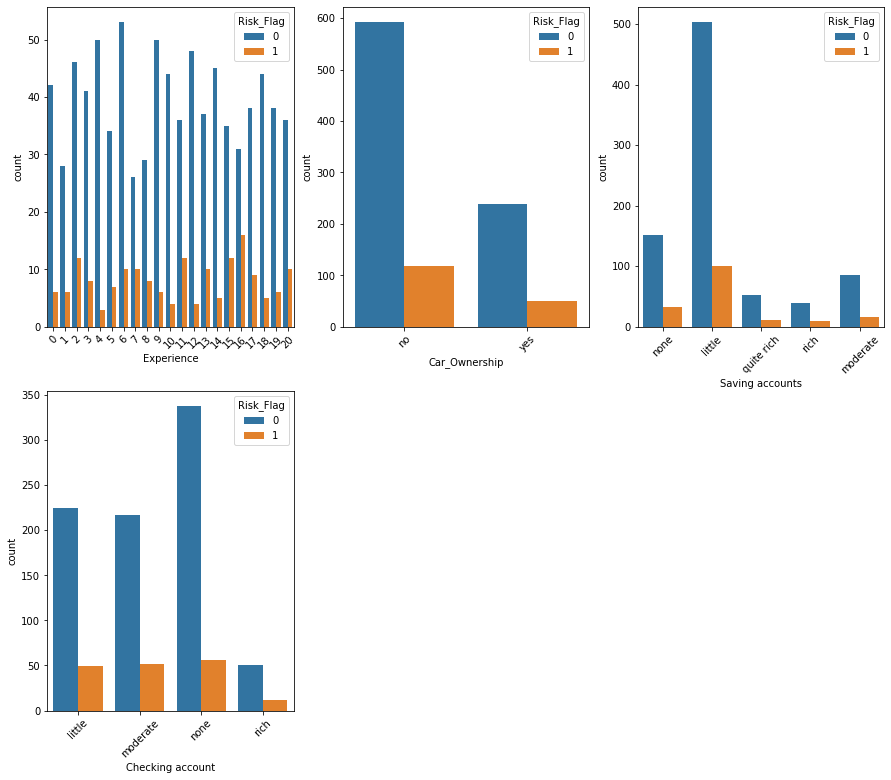

In [15]:
columns = ["Experience", "Car_Ownership", "Saving accounts", "Checking account"]
plt.figure(figsize = (15, 20))
for i in enumerate(columns):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(i[1], hue = 'Risk_Flag', data = data)
    plt.xticks(rotation = 45)

In [16]:
#married = 1
#car own yes = 1

columns_with_positive_values=[
            ('Car_Ownership', 'yes')
        ]
for column, positive_value in columns_with_positive_values:
        data[column] = data[column].apply(lambda x: 1 if x == positive_value else 0)

In [17]:
columns_with_orderings=[
            ('Saving accounts', ['none', 'little', 'moderate', 'rich', 'quite rich']),
            ('Checking account', ['none', 'little', 'moderate', 'rich'])
        ]
for column, ordering in columns_with_orderings:
        data[column] = data[column].apply(lambda x: ordering.index(x))

In [18]:
data

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag,House_Ownership_In_Months
0,0,1,1303834,23,3,single,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,0,1,1169000,0,156
1,1,2,7574516,40,10,single,rented,0,Software_Developer,Parbhani,Maharashtra,9,1,2,5951000,0,156
2,2,3,3991815,66,4,married,rented,0,Technical_writer,Alappuzha,Kerala,4,1,0,2096000,0,120
3,3,4,6256451,41,2,single,rented,1,Software_Developer,Bhubaneswar,Odisha,2,1,1,7882000,1,144
4,4,5,5768871,47,11,single,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,1,1,4870000,1,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,6907195,55,5,single,owned,0,Police_officer,Dharmavaram,Andhra_Pradesh,3,1,0,1736000,0,120
996,996,997,9253093,54,2,single,rented,1,Secretary,Danapur,Bihar,2,1,1,3857000,1,144
997,997,998,9464966,67,14,single,norent_noown,1,Statistician,Tiruppur,Tamil_Nadu,14,1,0,804000,0,120
998,998,999,3346084,23,18,single,rented,0,Web_designer,Sambalpur,Odisha,6,1,1,1845000,0,156


In [19]:
state = list(data['STATE'].unique())
city = list(data['CITY'].unique())
profession = list(data['Profession'].unique())

In [20]:
state.sort()
city.sort()
profession.sort()

In [21]:
le = LabelEncoder()
#data['Profession'] = le.fit_transform(data['Profession'])
#data['CITY'] = le.fit_transform(data['CITY'])
#data['STATE'] = le.fit_transform(data['STATE'])

category_col = ['Profession', 'CITY', "STATE"]
mapping_dict = {}
for col in category_col:
    data[col] = le.fit_transform(data[col])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
 
    mapping_dict[col] = le_name_mapping


In [55]:
#le.classes_ = state
#print(le.classes_)
#print(le.transform(le.classes_))
#print(le.transform(['Assam', 'Delhi']))

#for x in mapping_dict:
#    print(x)
#    print(mapping_dict[x])

In [23]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop("Id", axis=1)
data = data.drop("Married/Single", axis=1)
data = data.drop("Profession", axis=1)
data = data.drop("CITY", axis=1)
data = data.drop("STATE", axis=1)
data = data.drop("House_Ownership", axis=1)
data = data.drop("CURRENT_JOB_YRS", axis=1)

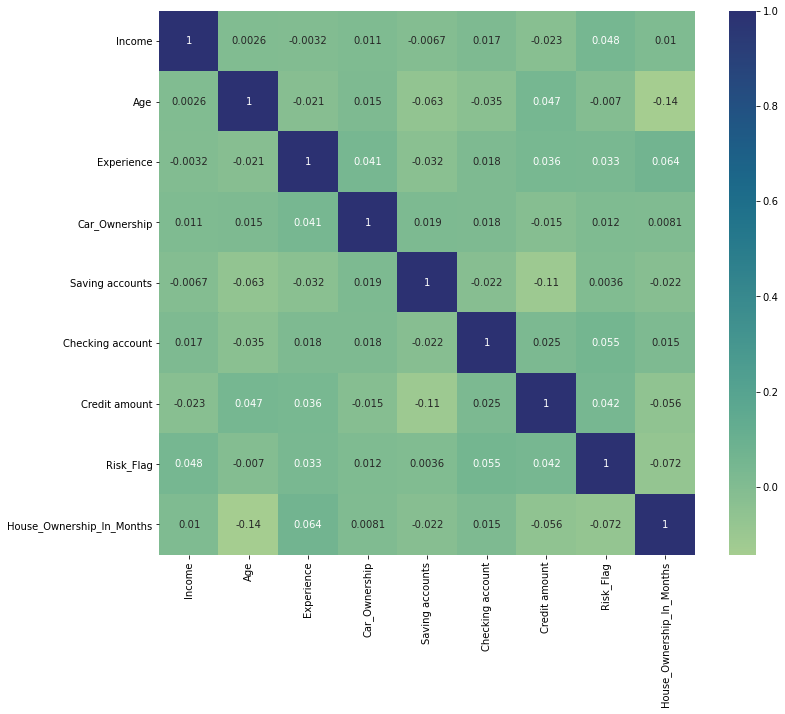

In [24]:
plt.figure(figsize=(12, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="crest")
plt.show()

In [26]:
df = data
y = df['Risk_Flag'].copy()
x = df.drop('Risk_Flag', axis=1).copy()

In [57]:
#x

In [56]:
#y

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [30]:
from sklearn.metrics import classification_report

# Logistic Regression

In [31]:
model_lr = LogisticRegression()

In [32]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = model_lr.predict(x_test)

In [34]:
model_lr.score(x_test, y_test)*100

85.33333333333334

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       256
           1       0.25      0.09      0.13        44

    accuracy                           0.83       300
   macro avg       0.55      0.52      0.52       300
weighted avg       0.77      0.83      0.79       300



# Decision Tree

In [36]:
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4)

In [37]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [38]:
y_pred = model_dt.predict(x_test)

In [39]:
model_dt.score(x_test, y_test)*100

80.33333333333333

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       256
           1       0.11      0.05      0.06        44

    accuracy                           0.80       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.74      0.80      0.77       300



# Naive Bayes

In [41]:
gnb = GaussianNB()

In [42]:
gnb.fit(x_train, y_train)

GaussianNB()

In [43]:
y_pred = gnb.predict(x_test)

In [44]:
gnb.score(x_test, y_test)*100

85.33333333333334

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       256
           1       0.25      0.09      0.13        44

    accuracy                           0.83       300
   macro avg       0.55      0.52      0.52       300
weighted avg       0.77      0.83      0.79       300



# KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(x_test)

In [49]:
knn.score(x_test, y_test)*100

82.66666666666667

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       256
           1       0.25      0.09      0.13        44

    accuracy                           0.83       300
   macro avg       0.55      0.52      0.52       300
weighted avg       0.77      0.83      0.79       300



In [51]:
import joblib
joblib.dump(knn,'model_joblib_risk')
model=joblib.load('model_joblib_risk')
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    
    
    
    print(p1, p2, p3, p4, p5, p6, p7, p8)
    model = joblib.load('model_joblib_risk')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    if result == 0:
        Label(master, text="No Risk").grid(row=31)
    elif result == 1:
        Label(master, text="Risk").grid(row=31)

In [52]:
master = Tk()
master.title("Risk Prediction System")

label = Label(master, text = "Risk Prediction System", bg = "black", fg = "white").grid(row=0,columnspan=2)

Label(master, text="Enter Income").grid(row=1)
Label(master, text="Enter Age").grid(row=2)
Label(master, text="Enter Experience").grid(row=3)
Label(master, text="Enter Car Ownnership").grid(row=4)
Label(master, text="Enter Saving Account").grid(row=5)
Label(master, text="Enter Checking Amount").grid(row=6)
Label(master, text="Enter Credit Amount").grid(row=7)
Label(master, text="Enter Number of years of house ownership in months").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()